In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [11]:
plt.rcParams['figure.figsize'] = 10, 3

In [12]:
# df = pd.read_csv('communities.csv')
df = pd.read_csv('eu.csv')

In [13]:
df.head()

,id,community,alpha,beta
0,0,1,1.0,0.0
1,1,1,1.0,0.0
2,2,1,1.0,0.0
3,3,1,1.0,0.0
4,4,1,1.0,0.0


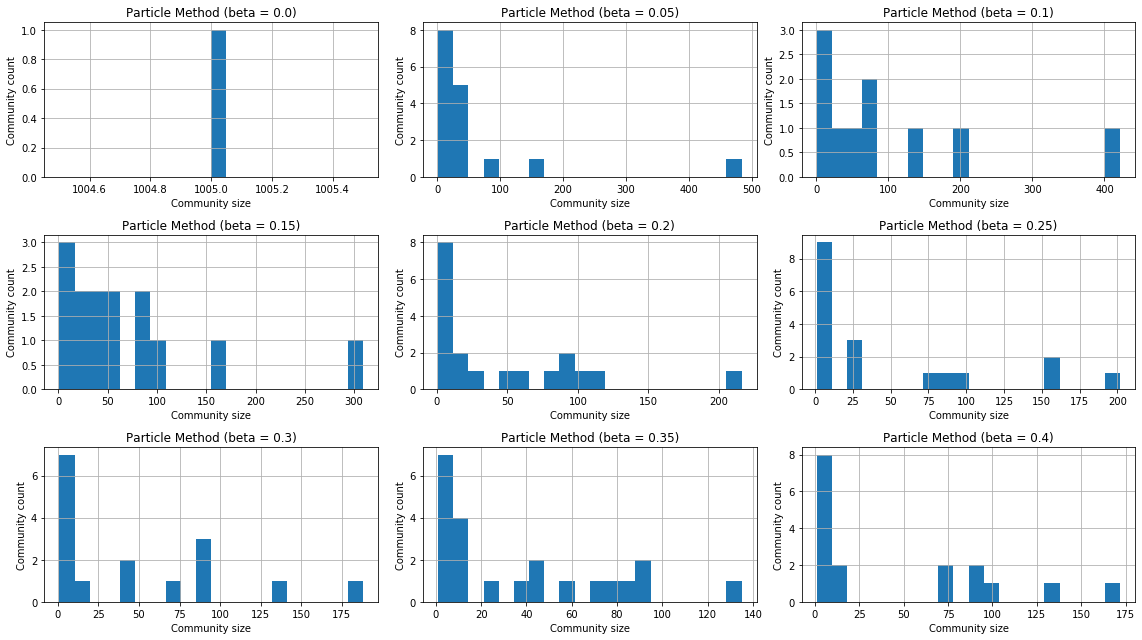

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(16,9))
betas = sorted(set(df['beta'].values))[:3*3]


for i in range(3):
    for j in range(3):
        beta = betas[i * 3 + j]
        ax = axes[i][j]

        bdf = df[df['beta'] == beta].groupby(by='community', as_index=False).count()['id']
        bdf = pd.DataFrame(bdf)
        desc = bdf['id'].describe()[["mean","std","max"]]
        bdf = bdf.groupby(by='id', as_index=False).size()
        bdf = pd.DataFrame(bdf)
        bdf = bdf.reset_index()
        bdf.columns = ['size', 'count']

        bdf.hist(bins=20, column='size', ax=ax)

        ax.set_title(f'Particle Method (beta = {beta})')
        ax.set_ylabel('Community count')
        ax.set_xlabel('Community size')

plt.tight_layout()
plt.savefig('particle_method.png')


In [15]:
for beta in betas:
    bdf = df[df['beta'] == beta].groupby(by='community', as_index=False).count()['id']
    bdf = pd.DataFrame(bdf)
    desc = bdf['id'].describe()[["mean","std","max"]]
    
    print("|Descriptor|{}|".format(f'Particle Method (beta = {beta})'))
    print("|Communities count|{}|".format(len(bdf)))
    print("|Community avg size|{}|".format(desc['mean']))
    print("|Community size std|{}|".format(round(desc['std']),2))
    print("|Community max size|{}|".format(desc['max']))
    print("--------------------")

|Descriptor|Particle Method (beta = 0.0)|
|Communities count|1|
|Community avg size|1005.0|
|Community size std|nan|
|Community max size|1005.0|
--------------------
|Descriptor|Particle Method (beta = 0.05)|
|Communities count|21|
|Community avg size|47.857142857142854|
|Community size std|107.0|
|Community max size|484.0|
--------------------
|Descriptor|Particle Method (beta = 0.1)|
|Communities count|16|
|Community avg size|62.8125|
|Community size std|111.0|
|Community max size|422.0|
--------------------
|Descriptor|Particle Method (beta = 0.15)|
|Communities count|20|
|Community avg size|50.25|
|Community size std|76.0|
|Community max size|309.0|
--------------------
|Descriptor|Particle Method (beta = 0.2)|
|Communities count|53|
|Community avg size|18.962264150943398|
|Community size std|40.0|
|Community max size|216.0|
--------------------
|Descriptor|Particle Method (beta = 0.25)|
|Communities count|46|
|Community avg size|21.847826086956523|
|Community size std|46.0|
|Commu

In [57]:
bdf = df[df['beta'] == 0.01].groupby(by='community', as_index=False).count()['id']
bdf = pd.DataFrame(bdf)
desc = bdf['id'].describe()[["mean","std","max"]]
bdf = bdf.groupby(by='id', as_index=False).size()
bdf = pd.DataFrame(bdf)
bdf = bdf.reset_index()
bdf.columns = ['size', 'count']

In [58]:
bdf

,size,count
0,90,1
1,170,1
2,177,1
3,189,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e39784d30>]],
      dtype=object)

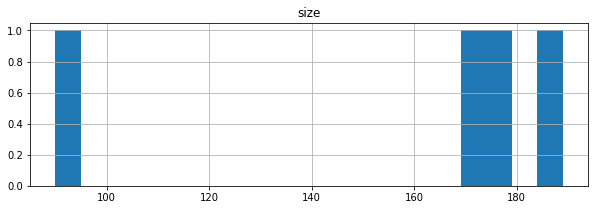

In [65]:
bdf.hist(bins=20, column='size')